###  Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 


### Import the necessary lib

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
airlines_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Initial analysis

In [3]:
airlines_data.shape

(3999, 12)

In [4]:
airlines_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [6]:
airlines_data2 = airlines_data.drop(labels = 'ID#',axis = 1)

In [7]:
airlines_data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Use standard scalar technique

In [8]:
std_scalar = StandardScaler()
std_data = std_scalar.fit_transform(airlines_data2)
std_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

### Use Kmeans Clustering

In [9]:
k = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(std_data)
    k.append(kmeans.inertia_)
    print(i,k)

1 [43989.000000000095]
2 [43989.000000000095, 35409.51662986136]
3 [43989.000000000095, 35409.51662986136, 30899.709743249437]
4 [43989.000000000095, 35409.51662986136, 30899.709743249437, 27154.035327088164]
5 [43989.000000000095, 35409.51662986136, 30899.709743249437, 27154.035327088164, 24885.496241999597]
6 [43989.000000000095, 35409.51662986136, 30899.709743249437, 27154.035327088164, 24885.496241999597, 22304.45891305639]
7 [43989.000000000095, 35409.51662986136, 30899.709743249437, 27154.035327088164, 24885.496241999597, 22304.45891305639, 19502.856098220436]
8 [43989.000000000095, 35409.51662986136, 30899.709743249437, 27154.035327088164, 24885.496241999597, 22304.45891305639, 19502.856098220436, 17316.753604356454]
9 [43989.000000000095, 35409.51662986136, 30899.709743249437, 27154.035327088164, 24885.496241999597, 22304.45891305639, 19502.856098220436, 17316.753604356454, 15960.42418877065]
10 [43989.000000000095, 35409.51662986136, 30899.709743249437, 27154.035327088164, 248

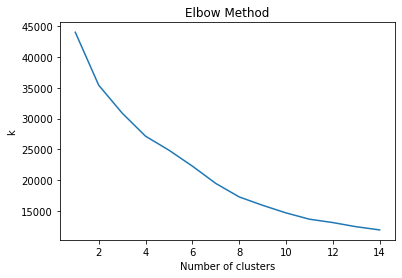

In [10]:
plt.plot(range(1,15),k)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('k')
plt.show()

In [11]:
kmeans1= KMeans(n_clusters=8,random_state=12)
kmeans1.fit(std_data)

KMeans(random_state=12)

In [12]:
kmeans1.labels_

array([7, 7, 7, ..., 0, 2, 2])

In [13]:
airlines_data2['output'] = kmeans1.labels_

In [14]:
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [15]:
kmeans1.cluster_centers_

array([[-1.53151141e-01, -5.83664081e-02, -2.64720468e-01,
        -9.82418871e-02, -6.27665798e-02, -2.71672161e-01,
        -1.03564877e-01, -2.74580340e-02, -2.07060165e-02,
         6.58849698e-02,  1.30391816e+00],
       [ 1.24463396e+00,  4.86198029e-01,  2.36594659e-01,
        -9.82418871e-02, -6.27665798e-02,  8.04931022e-01,
         1.89972964e+00,  4.05535908e+00,  4.30382999e+00,
         3.11921808e-01,  9.30488454e-01],
       [-3.87755253e-01, -1.44345997e-01, -5.88146828e-01,
        -9.82418871e-02, -6.27665798e-02, -5.28307335e-01,
        -5.21336656e-01, -2.21689246e-01, -2.43801729e-01,
        -9.75222109e-01, -7.66919299e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [16]:
airlines_data2.groupby('output').agg(['mean']).reset_index()

,output,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000
1,1,199014.459016,520.221311,2.385246,1.000000,1.000000,36582.278689,29.844262,6137.696721,17.696721,4762.639344,0.819672
2,2,34529.920172,32.453219,1.249785,1.000000,1.000000,4387.308155,6.595708,149.683262,0.448927,2104.846352,0.000000
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
6,6,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
7,7,59654.209494,32.939112,1.502580,1.000000,1.001032,6295.554180,8.510836,175.981424,0.532508,5643.721362,0.000000


### use hierarchical clustering

In [17]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [18]:
norm_data = norm_func(airlines_data.drop(labels = 'ID#',axis = 1))
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


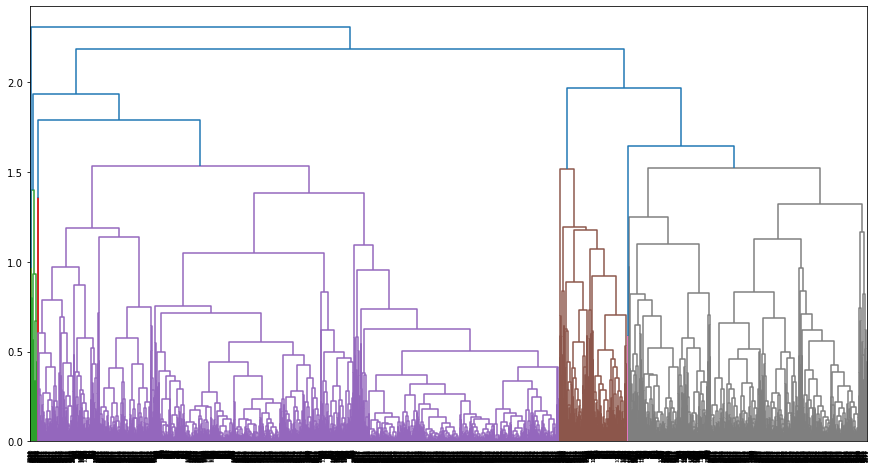

In [19]:
plt.figure(figsize = (15,8))
dendo = sch.dendrogram(sch.linkage(norm_data,method = 'complete'))

In [20]:
hcluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [21]:
y_hc = hcluster.fit_predict(norm_data)
y_hc

array([1, 1, 1, ..., 0, 4, 4], dtype=int64)

In [22]:
airlines_data['hclusturid']=y_hc

In [23]:
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusturid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [24]:
airlines_new = airlines_data.drop(labels = 'ID#',axis = 1)
airlines_new.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusturid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [25]:
airlines_new[airlines_new['hclusturid']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusturid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3786,27669,0,1,1,1,3219,7,0,0,3413,0,1
3790,73159,0,1,1,1,358,4,358,4,3237,0,1
3793,38827,0,1,1,1,0,0,0,0,2993,0,1
3794,29919,0,1,1,1,1225,3,0,0,2949,0,1


In [26]:
airlines_new[airlines_new['hclusturid']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusturid
6,84914,0,3,1,1,27482,25,0,0,6994,0,2
10,40091,0,2,1,1,7278,10,0,0,6959,0,2
12,43382,0,2,1,1,11150,20,0,0,6924,0,2
30,177926,0,3,1,1,20797,13,0,0,7886,0,2
32,276571,0,4,1,1,42044,23,0,0,7872,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3972,35185,0,2,1,1,5957,7,0,0,1439,0,2
3974,58387,0,3,1,1,14581,39,0,0,1435,0,2
3980,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,59017,0,4,1,1,34746,25,0,0,1418,0,2


In [27]:
airlines_new[airlines_new['hclusturid']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusturid
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
11,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,28495,0,4,1,1,49442,15,0,0,6912,1,3
16,51890,0,4,1,1,48963,16,0,0,6910,1,3
20,120576,0,5,1,1,58831,23,250,2,6896,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3855,190730,0,5,1,1,78916,28,2450,9,1648,1,3
3881,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,126167,0,5,1,1,190160,15,0,0,1612,1,3
3908,57642,0,4,1,1,52176,15,0,0,1564,1,3


In [28]:
airlines_new[airlines_new['hclusturid']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusturid
976,20498,0,1,1,1,7826,20,7226,18,5491,0,4
1014,96827,1094,1,1,1,12100,19,8100,17,5801,0,4
1122,27591,0,1,1,1,8209,34,1800,16,5659,0,4
1129,1625,0,1,1,1,1375,4,0,0,1547,0,4
1236,146086,0,1,1,1,6950,17,6950,17,5345,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,4
3992,11181,0,1,1,1,929,12,0,0,1407,0,4
3993,3974,0,1,1,1,365,3,0,0,1397,0,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [29]:
airlines_new[airlines_new['hclusturid']==5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusturid


### Use DBSACN cluster

In [30]:
dbscan_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')

In [31]:
dbscan_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [32]:
dbscan_new = dbscan_data.drop(labels = 'ID#',axis = 1)
dbscan_new.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [33]:
std = StandardScaler()
st_data = std.fit_transform(dbscan_new)
st_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [34]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit_predict(st_data)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
dbscan_new['y_dbscan']=dbscan.labels_

In [37]:
dbscan_new.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [105]:
dbscan_new[dbscan_new['y_dbscan']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [106]:
dbscan_new[dbscan_new['y_dbscan']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_dbscan
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,26504,0,2,1,1,10599,29,1000,7,1445,0,-1
3974,58387,0,3,1,1,14581,39,0,0,1435,0,-1
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,-1
3980,28867,0,3,1,1,19169,28,0,0,1425,0,-1


In [107]:
dbscan_new[dbscan_new['y_dbscan']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_dbscan
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,51890,0,4,1,1,48963,16,0,0,6910,1,1
17,13958,0,1,1,1,4291,5,0,0,6905,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1


In [108]:
dbscan_new[dbscan_new['y_dbscan']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_dbscan
2105,27981,0,5,1,1,63004,17,0,0,2921,1,2
2420,41040,0,5,1,1,66292,14,200,2,3372,1,2
2665,61285,0,5,1,1,55027,22,0,0,2412,1,2
2895,44101,0,5,1,1,57114,19,0,0,1829,1,2
3032,68532,0,5,1,1,68704,21,0,0,2822,1,2
3042,45533,0,5,1,1,56208,16,0,0,2963,1,2
3149,11109,0,5,1,1,53627,13,0,0,2623,1,2
3311,48131,0,5,1,1,60090,18,0,0,2161,1,2


In [109]:
dbscan_new[dbscan_new['y_dbscan']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,y_dbscan


<Figure size 576x360 with 0 Axes>

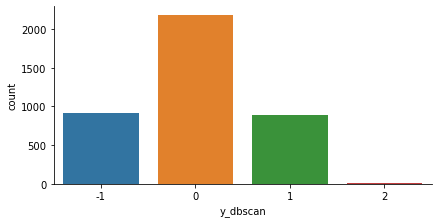

In [44]:
plt.figure(figsize = (8,5))
sns.factorplot('y_dbscan',data = dbscan_new,kind = 'count',size = 3,aspect = 2)